In [1]:
# подключаемые библиотеки
import numpy as np
import matplotlib.pyplot as plt
# import tikzplotlib

$$
     f(\mathbf{x}) = 20 + [ x^2 - 10 \cos{ (2 \pi x) } ] + [ y^2 - 10 \cos{ (2 \pi y) } ]
$$

In [2]:
# целевая функция
def f(x, y):
    return 20 + (x ** 2 - 10 * np.cos(2 * np.pi * x )) + (y ** 2 - 10 * np.cos(2 * np.pi * y ))

In [3]:
# задаем область X
x = np.linspace(-5.12, 5.12, 250)
y = np.linspace(-5.12, 5.12, 250)

# перевод в координатрную сетку для 3d-моделирования
xgrid, ygrid = np.meshgrid(x, y)
zgrid = f(xgrid, ygrid)

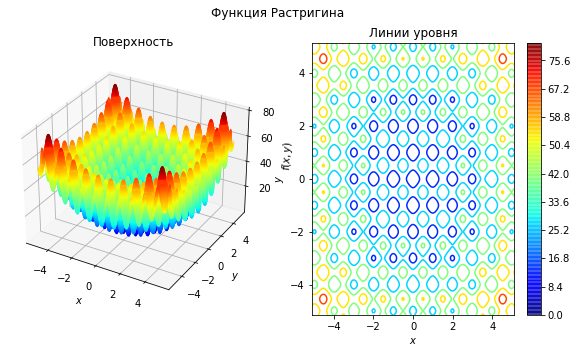

In [4]:
# поверхность и линии уровня функции
fig = plt.figure(figsize=(10, 5))
fig.suptitle('Функция Растригина')

ax = fig.add_subplot(1, 2, 1, projection='3d')
c = ax.contour3D(xgrid, ygrid, zgrid, 250, cmap='jet')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$f(x, y)$')
ax.set_title('Поверхность')

ax = fig.add_subplot(1, 2, 2)
ax.contour(xgrid, ygrid, zgrid, cmap='jet')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_title('Линии уровня')

plt.colorbar(c)
# plt.show()

In [5]:
# функция считает текущий ''глобальный'' минимум
def CalcMinAll(Xmin):
    return np.array(min(Xmin, key= lambda x : f(*x)))

In [6]:
def PS(M, L, alpha, beta, gamma):
    # эти массивы необходимы для дальнейшего моделирования
    X = np.empty((L, M, 2)) # текущее положение каждой из частиц на каждой итерации задается точкой (x, y)
    V = np.empty((L, M, 2)) # текщая скорость
    F = np.empty((L, ))     # значение функции в текщем общем минимуме 
    Xmin = np.empty((L, M, 2)) # текущий собственный минимум для каждой из точек на каждой из итераций 
    XMinAll = np.empty((L, 2, )) # текущий общий минимум на каждой итерации

    # начальная инициализации -- выбираем случайное положение и случайное направление
    for m in range(M):
        X[0][m][0], X[0][m][1] = np.random.uniform(-5.12, 5.12), np.random.uniform(-5.12, 5.12) 
        Xmin[0][m][0], Xmin[0][m][1] = X[0][m][0], X[0][m][1]

        V[0][m][0], V[0][m][1] = np.random.uniform(-1, 1), np.random.uniform(-1, 1) 

    # начальный общий минимум и значение функции в нем
    XMinAll[0] = CalcMinAll(Xmin[0])
    F[0] = f(*XMinAll[0])

    # на каждой итерации для каждого агента вычисляем по формулам из метода скорость, новое положение и обновляем минимумы
    for l in range(1, L):
        for m in range(M):
            V[l][m] = alpha * V[l-1][m] + beta * np.random.uniform() * (Xmin[l-1][m] - X[l - 1][m]) + gamma * np.random.uniform() * (XMinAll[l - 1] - X[l-1][m])

            X[l][m] = X[l-1][m] + V[l][m]
            
            if f(*X[l][m]) < f(*Xmin[l-1][m]):
                Xmin[l][m] = X[l][m][:]
            else:
                Xmin[l][m] = Xmin[l - 1][m][:]

        XMinAll[l] = CalcMinAll(Xmin[l])
        F[l] = f(*XMinAll[l])
        
    print(f"{XMinAll[-1]}\tЗначение = {F[-1]:.25f}")
    return X, V, Xmin, XMinAll, F, 

In [7]:
X, V, Xmin, XMinAll, F = PS(25, 750, 0.95, 0.2, 0.2) # с выбранными параметрами запускаем метод

[-1.16644810e-09 -1.18104514e-09]	Значение = 0.0000000000000000000000000


In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


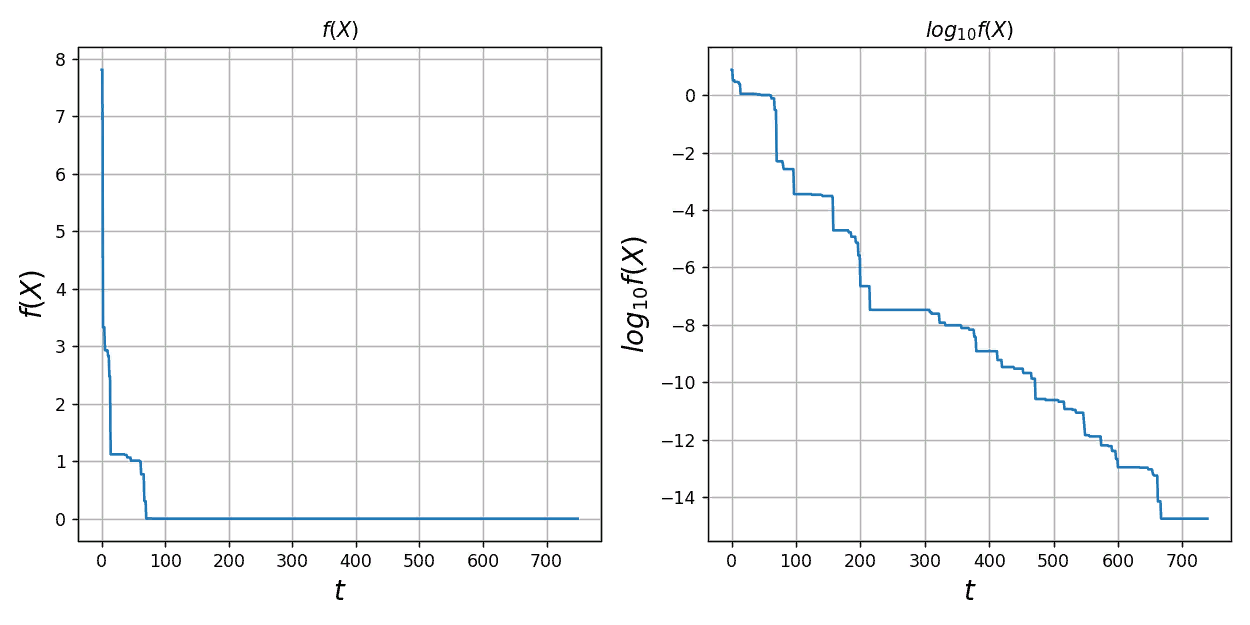

<ipython-input-9-0e403a90d2f7>:13: RuntimeWarning: divide by zero encountered in log10
  axes[1].plot(np.log10(F))


In [9]:
# график динамики значение целевой функции
# не очень понятно, что просходит начиная с 100-ой итерации, поэтому полезен логарифмический график
fig, axes = plt.subplots(1, 2, tight_layout = True, figsize=(10, 5))

plt.rcParams['text.usetex'] = True
axes[0].set(title=r'$f(X)$')
axes[1].set(title=r'$log_{10}f(X)$')

axes[0].set_ylabel(r'$f(X)$', fontsize = 16)
axes[0].set_xlabel(r'$t$', fontsize = 16)
axes[1].set_ylabel(r'$log_{10}f(X)$', fontsize = 16)
axes[1].set_xlabel(r'$t$', fontsize = 16)

axes[0].plot(F)
axes[1].plot(np.log10(F))

axes[0].grid()
axes[1].grid()

plt.rcParams['text.usetex'] = False

plt.show()
tikzplotlib.save("PS.tex", flavor="context")

In [10]:
from matplotlib.animation import FuncAnimation

<IPython.core.display.Javascript object>


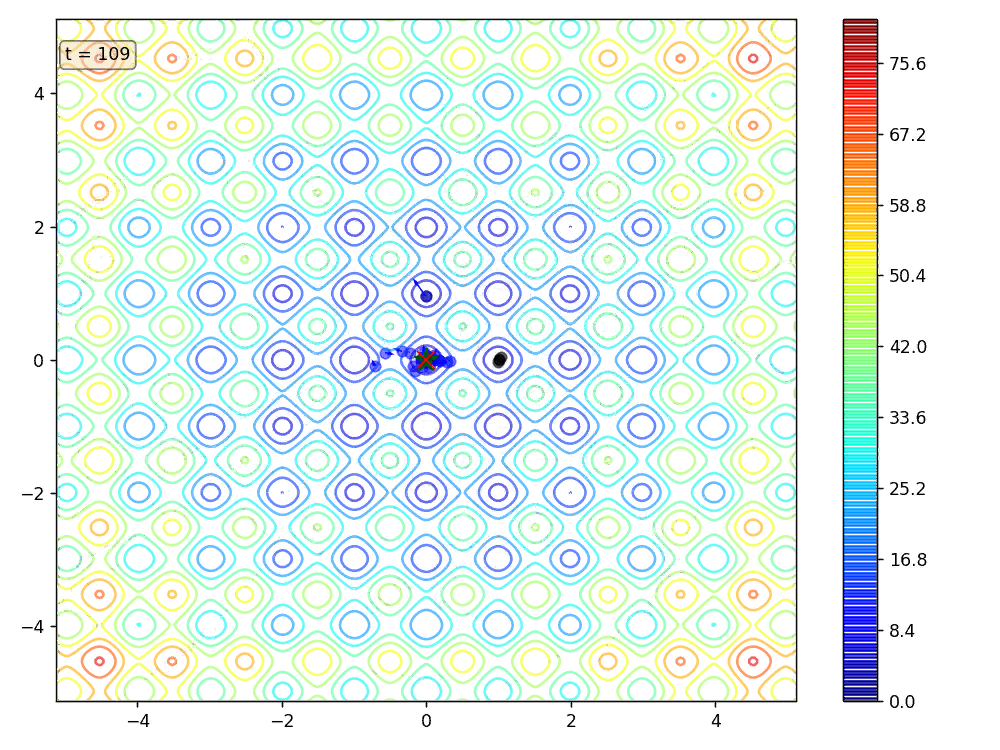

In [12]:
# анимационное представление, здесь пригодятся те данные, которые получены из метода
fig, ax = plt.subplots(figsize=(8,6))
fig.set_tight_layout(True)

ax.plot([0], [0], marker='x', markersize=10, linewidth=2, color="red")
ax.contour(xgrid, ygrid, zgrid, 10, cmap='jet', alpha=0.6)
pbest_plot = ax.scatter(Xmin[0, :, 0], Xmin[0, :, 1], marker='o', color='black', alpha=0.55)
p_plot = ax.scatter(X[0, :, 0], X[0, :, 1], marker='o', color='blue', alpha=0.5)
p_arrow = ax.quiver(X[0, :, 0], X[0, :, 1], V[0, :, 0], V[0, :, 1], color='blue', width=0.002, angles='xy', scale_units='xy', scale=1)
gbest_plot = plt.scatter([XMinAll[0, 0]], [XMinAll[0, 1]], marker='*', s=196, color='darkgreen', alpha=0.85)
title = ax.text(-5, 4.5, f"t = 0", bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
ax.set_xlim([-5.12, 5.12])
ax.set_ylim([-5.12, 5.12])
plt.colorbar(c)
 
def animate(i):
    "Steps of PSO: algorithm update and show in plot"
    title.set_text(f't = {i}')
    pbest_plot.set_offsets(np.c_[Xmin[i, :, 0], Xmin[i, :, 1]])
    p_plot.set_offsets(np.c_[X[i, :, 0], X[i, :, 1]])
    p_arrow.set_offsets(np.c_[X[i, :, 0], X[i, :, 1]])
    p_arrow.set_UVC(V[i, :, 0], V[i, :, 1])
    gbest_plot.set_offsets(np.c_[[XMinAll[i, 0]], [XMinAll[i, 1]]])
    return ax, pbest_plot, p_plot, p_arrow, gbest_plot,
 
anim = FuncAnimation(fig, animate, frames=200, interval=250, blit=False, repeat=True)
plt.show()

In [15]:
anim.save("PS.gif", writer="imagemagick")

MovieWriter imagemagick unavailable; using Pillow instead.
